## SP23 CS 477/577: Python for Machine Learning

### Homework 1: Python for basic data processing

This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset. 

Tasks:

[Task 1: Explore the dataset. 40 points](#section1)

[Task 2: Data search. 15 points](#section2)

[Task 3: Study the 'area'feature. 15 points](#section3)

[Task 4: Count data samples. 10 poits](#section4)

[Task 5:Define a function. 20 points](#section5)

## Dataset

    - Number of data samples/rows: 569
    - Each data sample has 30 numeric features/attributes. All features of a data sample form a `feature vector' (each row).
    - The first 10 features were directly calculated using mean feautues of all nuclei in an H&E image(Fig. 1).
    - Only the first 10 features of each data sample will be used in this assignment.
    
    - Each data sample is associated with one class label: 0 or 1
        : 212 Malignant (0)
        : 357 Benign (1)
        
    - Get more details at: 
        https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
\
![breast image](breastimg.png)

| *Fig. 1. Cell nuclei in a breast histopathology image* | 
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|



In [2]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# load dataset

breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))
print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [4]:
# NOT REQUIRED

print(breast_ds["data"])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
# NOT REQUIRED

print(breast_ds.data[:, :10])

[[1.799e+01 1.038e+01 1.228e+02 ... 1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 ... 7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 1.520e-01 2.397e-01 7.016e-02]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 1.587e-01 5.884e-02]]


In [6]:
# NOT REQUIRED

df_breast = pd.DataFrame(breast_ds.data, columns = breast_ds.feature_names)
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# we will use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10] # feature vectors: use the first 10 features
tgts = breast_ds.target # class labels

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)
print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)
Target labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 

In [8]:
# Not required

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')

ftrs_df = pd.DataFrame(ftrs[:], columns = breast_ds.feature_names[:10])
display(ftrs_df)

tgts_df = pd.DataFrame(tgts[:], columns = breast_ds.target_names[:1])
display(tgts_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243


,malignant
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Task 1: Explore the dataset.  40 points <a id = "section1"/>

In [9]:
#Task 1.1 check the data type of 'ftrs' and 'tgts', and print it out. 5 points

print("ftrs datatype:\n", type(ftrs))
print("\ntgts datatype:\n", type(tgts))

ftrs datatype:
 <class 'numpy.ndarray'>

tgts datatype:
 <class 'numpy.ndarray'>


In [10]:
#Task 1.2 print out the the features and class label of the 10th data samples. 5 points

print(ftrs[9])
print(tgts[9])

[1.246e+01 2.404e+01 8.397e+01 4.759e+02 1.186e-01 2.396e-01 2.273e-01
 8.543e-02 2.030e-01 8.243e-02]
0


In [11]:
#Task 1.3 count and print out the number of malignant samples (0). 5 points

print("Malignant Samples:")
malignant_samples_count = 0
for index, features in enumerate(ftrs):
    if tgts[index] == 0:
        print(features, tgts[index])
        malignant_samples_count += 1

print("\nCount of malignant samples:\n", malignant_samples_count)

print("\nPrinting out array of malignant samples:")
malignant_samples = np.zeros((malignant_samples_count, 10))
i = 0
for index, features in enumerate(ftrs):
    if tgts[index] == 0:
        malignant_samples[i] = features
        i += 1
print(malignant_samples)


Malignant Samples:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02] 0
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02] 0
[1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
 1.279e-01 2.069e-01 5.999e-02] 0
[1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
 1.052e-01 2.597e-01 9.744e-02] 0
[2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02] 0
[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02] 0
[1.825e+01 1.998e+01 1.196e+02 1.040e+03 9.463e-02 1.090e-01 1.127e-01
 7.400e-02 1.794e-01 5.742e-02] 0
[1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
 5.985e-02 2.196e-01 7.451e-02] 0
[1.300e+01 2.182e+01 8.750e+01 5.198e+02 1.273e-01 1.932e-01 1.859e-01
 9.353e-02 2.350e-01 7.389e-02] 0
[1.246e+01 2.404e+01 8.397e+01 4.759

In [12]:
#Task 1.4 count and print out the number of benign samples (1). 5 points

print("Benign Samples:")
benign_samples_count = 0
for index, features in enumerate(ftrs):
    if tgts[index] == 1:
        print(features, tgts[index])
        benign_samples_count += 1

print("\nCount of benign samples:\n", benign_samples_count)

print("\nPrinting out array of benign samples:")
benign_samples = np.zeros((benign_samples_count, 10))
i = 0
for index, features in enumerate(ftrs):
    if tgts[index] == 1:
        benign_samples[i] = features
        i += 1
print(benign_samples)

Benign Samples:
[1.354e+01 1.436e+01 8.746e+01 5.663e+02 9.779e-02 8.129e-02 6.664e-02
 4.781e-02 1.885e-01 5.766e-02] 1
[1.308e+01 1.571e+01 8.563e+01 5.200e+02 1.075e-01 1.270e-01 4.568e-02
 3.110e-02 1.967e-01 6.811e-02] 1
[9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
 2.076e-02 1.815e-01 6.905e-02] 1
[1.303e+01 1.842e+01 8.261e+01 5.238e+02 8.983e-02 3.766e-02 2.562e-02
 2.923e-02 1.467e-01 5.863e-02] 1
[8.196e+00 1.684e+01 5.171e+01 2.019e+02 8.600e-02 5.943e-02 1.588e-02
 5.917e-03 1.769e-01 6.503e-02] 1
[1.205e+01 1.463e+01 7.804e+01 4.493e+02 1.031e-01 9.092e-02 6.592e-02
 2.749e-02 1.675e-01 6.043e-02] 1
[1.349e+01 2.230e+01 8.691e+01 5.610e+02 8.752e-02 7.698e-02 4.751e-02
 3.384e-02 1.809e-01 5.718e-02] 1
[1.176e+01 2.160e+01 7.472e+01 4.279e+02 8.637e-02 4.966e-02 1.657e-02
 1.115e-02 1.495e-01 5.888e-02] 1
[1.364e+01 1.634e+01 8.721e+01 5.718e+02 7.685e-02 6.059e-02 1.857e-02
 1.723e-02 1.353e-01 5.953e-02] 1
[1.194e+01 1.824e+01 7.571e+01 4.376e+0

In [13]:
#Task 1.5 calculate the average (mean) of feature vectors of benign samples: 5 values

b_mean = np.mean(benign_samples, axis = 0) # benign_samples calculated in previous answer
print(b_mean)


[1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02]


In [14]:
#Task 1.6 calculate the average (mean) of feature vectors of malignant samples: 5 values

m_mean = np.mean(malignant_samples, axis = 0) # benign_samples calculated in previous answer
print(m_mean)


[1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02]


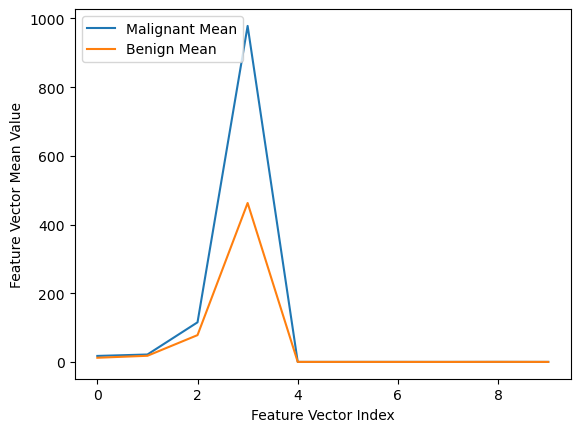

In [15]:
#Task 1.7 plot the mean feature vectors (m_mean, b_mean) using matplotlib. 10 points

plt.plot(m_mean, label = "Malignant Mean")
plt.plot(b_mean, label = "Benign Mean")
plt.xlabel("Feature Vector Index")
plt.ylabel("Feature Vector Mean Value")
plt.legend(loc="upper left")
plt.show()


### Task 2: Data search. 15 points.  <a id = "section2"/>

Let the user input an index (0 to 568) of a data sample, and print out the feature vector and the corresponding class label of that sample.

    - Require multiple searches in one run
    - **Extra 5 points for dealing with abnormal input, e.g., out-of-range index


In [16]:
#### tip: use the input() function and while loop

input_index = -1
not_in_range = 1
while not_in_range:
    input_index = input(f"Please enter an index of datasample you would like (expecting input from 0 to {len(ftrs)-1} inclusive); enter \"Exit\" to end program:")
    if input_index == "Exit":
        break
    # start of exit condition for loop
    if input_index.isnumeric(): # check for abnormal input like out of range and strings
        input_index = int(input_index)
        if 0 <= input_index and input_index <= 568:
            not_in_range = 0 # is in range
            print("Corresponding feature vector of data sample of inputted index:\n", ftrs[input_index])
            print("Corresponding class label of the data sample:\n", tgts[input_index])
            break
        else: 
            continue
    else:
        continue
#print(input_index, type(input_index))        
        

Please enter an index of datasample you would like (expecting input from 0 to 568 inclusive); enter "Exit" to end program: 3


Corresponding feature vector of data sample of inputted index:
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
 1.052e-01 2.597e-01 9.744e-02]
Corresponding class label of the data sample:
 0


### Task 3.  Study the 'area' (index = 3) feature. 15 points  <a id = "section3"/>

Calculating mean, min, and max feature area for all benign samples using loop:

Mean of feature area of benign samples: 462.79019607843145
Minimum of feature are of benign samples: 143.5
Maximum of feature are of benign samples: 992.1

Calculating mean, min, and max feature area for all benign samples using built in functions:

Mean of feature area of benign samples: 462.7901960784313
Minimum of feature are of benign samples: 143.5
Maximum of feature are of benign samples: 992.1


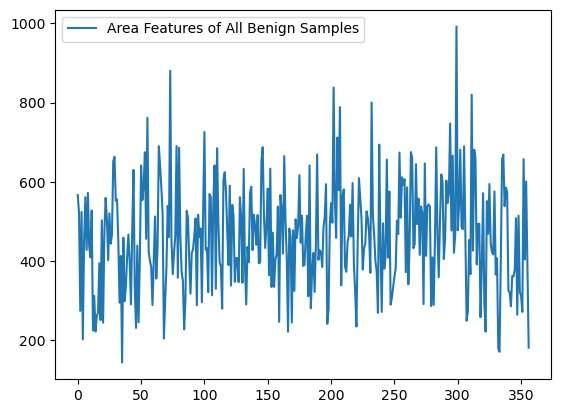

In [17]:
#Task 3.1: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all benign samples.

print("Calculating mean, min, and max feature area for all benign samples using loop:\n")

index = 0
b_mean_area = 0
b_min_area = benign_samples[0, 3]
b_max_area = benign_samples[0, 3]
for index, feature in enumerate(benign_samples):
    #print(benign_samples[index, 3])
    #print(index)
    b_mean_area += benign_samples[index, 3]
    if index == (benign_samples.shape[0] - 1):
        b_mean_area = b_mean_area / benign_samples.shape[0]
    if b_min_area > benign_samples[index, 3]:
        b_min_area = benign_samples[index, 3]
    if b_max_area < benign_samples[index, 3]:
        b_max_area = benign_samples[index, 3]
print("Mean of feature area of benign samples:", b_mean_area)
print("Minimum of feature are of benign samples:", b_min_area)
print("Maximum of feature are of benign samples:", b_max_area)

print("\nCalculating mean, min, and max feature area for all benign samples using built in functions:\n")

b_mean_area = benign_samples[:,3].mean()
b_min_area = benign_samples[:,3].min()
b_max_area = benign_samples[:,3].max()
print("Mean of feature area of benign samples:", b_mean_area)
print("Minimum of feature are of benign samples:", b_min_area)
print("Maximum of feature are of benign samples:", b_max_area)

# plot the area features of all benign samples

plt.plot(benign_samples[:, 3], label = "Area Features of All Benign Samples")
plt.legend(loc = "upper left")
plt.show()


Calculating mean, min, and max feature area for all malignant samples using loop:

Mean of feature area of malignant samples: 978.3764150943397
Minimum of feature are of malignant samples: 361.6
Maximum of feature are of malignant samples: 2501.0

Calculating mean, min, and max feature area for all malignant samples using built in functions:

Mean of feature area of malignant samples: 978.3764150943397
Minimum of feature are of malignant samples: 361.6
Maximum of feature are of malignant samples: 2501.0


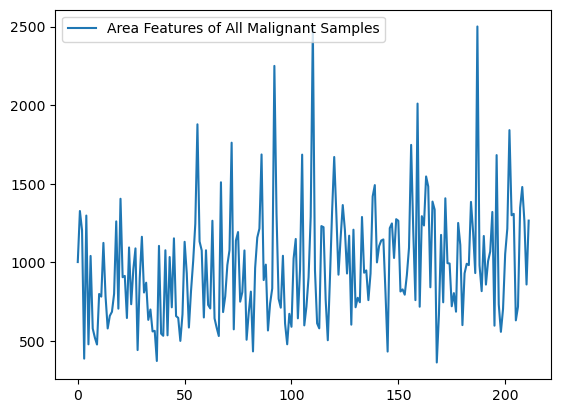

In [18]:
#Task 3.2: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all malignant samples.

print("Calculating mean, min, and max feature area for all malignant samples using loop:\n")

index = 0
m_mean_area = 0
m_min_area = malignant_samples[0, 3]
m_max_area = malignant_samples[0, 3]
for index, feature in enumerate(malignant_samples):
    #print(malignant_samples[index, 3])
    #print(index)
    m_mean_area += malignant_samples[index, 3]
    if index == (malignant_samples.shape[0] - 1):
        m_mean_area = m_mean_area / malignant_samples.shape[0]
    if m_min_area > malignant_samples[index, 3]:
        m_min_area = malignant_samples[index, 3]
    if m_max_area < malignant_samples[index, 3]:
        m_max_area = malignant_samples[index, 3]
print("Mean of feature area of malignant samples:", m_mean_area)
print("Minimum of feature are of malignant samples:", m_min_area)
print("Maximum of feature are of malignant samples:", m_max_area)

print("\nCalculating mean, min, and max feature area for all malignant samples using built in functions:\n")

m_mean_area = malignant_samples[:,3].mean()
m_min_area = malignant_samples[:,3].min()
m_max_area = malignant_samples[:,3].max()
print("Mean of feature area of malignant samples:", m_mean_area)
print("Minimum of feature are of malignant samples:", m_min_area)
print("Maximum of feature are of malignant samples:", m_max_area)

# plot the area features of all malignant samples

plt.plot(malignant_samples[:, 3], label = "Area Features of All Malignant Samples")
plt.legend(loc = "upper left")
plt.show()


#### Task 3.3: What observations can you get from the results of Tasks 3.1 and 3.2?

Response:








The 'area' feature is typically larger in value for malignant samples than they are for benign samples. This is showcased by malignant samples having a higher calculated mean, minimum, and maximum values than benign samples. It also seems that, in general, the malignant samples deviate more in value from each other than the benign samples.

### Task 4:   Count data samples. 10 points<a id = "section4"/> 



In [19]:
# Task 4.1 Count the number of malignant samples that have 'area (index 3)' value less than 600. 10 points

count = 0
for index, feature in enumerate(malignant_samples):
    if malignant_samples[index, 3] < 600:
        count = count + 1
print("Number of malignant samples with 'area' value less than 600:", count)

Number of malignant samples with 'area' value less than 600: 31


In [20]:
# Task 4.2 Count the number of benign samples that have 'area (index 3)' values less than 600. 10 points

count = 0
for index, feature in enumerate(benign_samples):
    if benign_samples[index, 3] < 600:
        count = count + 1
print("Number of malignant samples with 'area' value less than 600:", count)

Number of malignant samples with 'area' value less than 600: 304


### Task 5: Define a function. 20 points <a id = "section5"/>

Define a function that calculates and return the Euclidean distance between any two given data samples
 

In [23]:
# Task 5.1

def Eclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients
        
        return: d: the distance
    '''
    
    print(a.shape)
    print(b.shape)
    euclidean_distance = 0
    euclidean_distance = np.sqrt(np.sum((a - b)**2))
    return euclidean_distance
    
# test
print('two malignant samples:', Eclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Eclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Eclidean(b_mean, m_mean)) # betwwen means

(10,)
(10,)
two malignant samples: 123.08662898837753
(10,)
(10,)
two benign samples: 46.35812850705252
(10,)
(10,)
between two mean vectors: 516.9734937120692


In [24]:
# Task 5.2 calculate and print out the Eclidean distance between 
# every feature vector (ftrs[i]) and the mean feature vector of maliganant samples (m_mean)

for index, feature in enumerate(ftrs): 
    print("Euclidean distance between every feature vector and the mean feature vector of malignant samples:", Eclidean(ftrs[index], m_mean))


(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 26.33286841188874
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 348.100547954307
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 225.11112082189712
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 593.5125407983936
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 319.32932515401563
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 502.40778179535005
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant samples: 61.795325836513186
(10,)
(10,)
Euclidean distance between every feature vector and the mean feature vector of malignant 